In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
enrollment_df = pd.read_csv("../data/2017-18__-_2021-22_Demographic_Snapshot_20240410.csv")

In [3]:
enrollment_df.head(5)

DBN                School Name     Year  Total Enrollment  Grade 3K  \
0  01M015  P.S. 015 Roberto Clemente  2017-18               190         0   
1  01M015  P.S. 015 Roberto Clemente  2018-19               174         0   
2  01M015  P.S. 015 Roberto Clemente  2019-20               190         0   
3  01M015  P.S. 015 Roberto Clemente  2020-21               193         0   
4  01M015  P.S. 015 Roberto Clemente  2021-22               179         0   

   Grade PK (Half Day & Full Day)  Grade K  Grade 1  Grade 2  Grade 3  ...  \
0                              17       28       32       33       23  ...   
1                              13       20       33       30       30  ...   
2                              14       29       28       38       33  ...   
3                              17       29       29       27       30  ...   
4                              15       30       26       24       22  ...   

   % White  # Missing Race/Ethnicity Data  % Missing Race/Ethnicity Data  \
0    0.032                              0                            0.0   
1    0.034                              0                            0.0   
2    0.047                              0                            0.0   
3    0.057                              0                            0.0   
4    0.067                              0                            0.0   

   # Students with Disabilities  % Students with Disabilities  \
0                            49                         0.258   
1                            39                         0.224   
2                            46                         0.242   
3                            44                         0.228   
4                            38                         0.212   

   # English Language Learners  % English Language Learners  # Poverty  \
0                            8                        0.042        161   
1                            8                        0.046        147   
2                           17                        0.089        155   
3                           21                        0.109        161   
4                           11                        0.061        150   

   % Poverty  Economic Need Index  
0      84.7%                89.0%  
1      84.5%                88.8%  
2      81.6%                86.7%  
3      83.4%                86.4%  
4      83.8%                87.9%  

[5 rows x 44 columns]

In [4]:
enrollment_df['Year'].unique()

array(['2017-18', '2018-19', '2019-20', '2020-21', '2021-22'],
      dtype=object)

In [5]:
enrollment_df['Economic Need Index'].unique()

array(['89.0%', '88.8%', '86.7%', '86.4%', '87.9%', '67.9%', '68.7%',
       '70.4%', '69.6%', '67.8%', '80.0%', '75.4%', '78.4%', '77.0%',
       '75.3%', '93.7%', '94.8%', 'Above 95%', '94.4%', '76.2%', '73.7%',
       '76.5%', '88.2%', '89.5%', '91.6%', '90.3%', '86.3%', '58.0%',
       '59.4%', '62.7%', '65.1%', '66.3%', '90.1%', '94.6%', '94.2%',
       '91.3%', '90.0%', '93.3%', '92.5%', '91.7%', '91.1%', '91.2%',
       '90.2%', '90.7%', '89.7%', '65.3%', '67.2%', '67.1%', '65.5%',
       '62.1%', '89.9%', '87.5%', '87.8%', '83.4%', '84.2%', '36.9%',
       '34.9%', '38.2%', '39.8%', '43.8%', '84.8%', '81.6%', '81.7%',
       '85.3%', '84.9%', '50.5%', '53.4%', '53.6%', '54.6%', '52.1%',
       '47.8%', '46.0%', '46.2%', '49.1%', '55.4%', '57.9%', '57.2%',
       '60.7%', '85.4%', '82.9%', '82.8%', '85.0%', '83.1%', '80.2%',
       '62.9%', '65.4%', '64.7%', '65.0%', '92.4%', '94.1%', '28.2%',
       '26.9%', '29.1%', '28.7%', '25.6%', '85.5%', '88.6%', '41.4%',
       '40.6%', 

In [6]:
# replacing "Above 95%" to "95%"
enrollment_df['Economic Need Index'] = enrollment_df['Economic Need Index'].replace({'Above 95%' : '95%'})

In [7]:
enrollment_df['Economic Need Index'] = enrollment_df['Economic Need Index'].str.rstrip('%').astype('float') / 100

In [8]:
enrollment_df.head(5)

DBN                School Name     Year  Total Enrollment  Grade 3K  \
0  01M015  P.S. 015 Roberto Clemente  2017-18               190         0   
1  01M015  P.S. 015 Roberto Clemente  2018-19               174         0   
2  01M015  P.S. 015 Roberto Clemente  2019-20               190         0   
3  01M015  P.S. 015 Roberto Clemente  2020-21               193         0   
4  01M015  P.S. 015 Roberto Clemente  2021-22               179         0   

   Grade PK (Half Day & Full Day)  Grade K  Grade 1  Grade 2  Grade 3  ...  \
0                              17       28       32       33       23  ...   
1                              13       20       33       30       30  ...   
2                              14       29       28       38       33  ...   
3                              17       29       29       27       30  ...   
4                              15       30       26       24       22  ...   

   % White  # Missing Race/Ethnicity Data  % Missing Race/Ethnicity Data  \
0    0.032                              0                            0.0   
1    0.034                              0                            0.0   
2    0.047                              0                            0.0   
3    0.057                              0                            0.0   
4    0.067                              0                            0.0   

   # Students with Disabilities  % Students with Disabilities  \
0                            49                         0.258   
1                            39                         0.224   
2                            46                         0.242   
3                            44                         0.228   
4                            38                         0.212   

   # English Language Learners  % English Language Learners  # Poverty  \
0                            8                        0.042        161   
1                            8                        0.046        147   
2                           17                        0.089        155   
3                           21                        0.109        161   
4                           11                        0.061        150   

   % Poverty  Economic Need Index  
0      84.7%                0.890  
1      84.5%                0.888  
2      81.6%                0.867  
3      83.4%                0.864  
4      83.8%                0.879  

[5 rows x 44 columns]

In [9]:
enrollment_df[['DBN',"Year","Total Enrollment","Economic Need Index"]]

DBN     Year  Total Enrollment  Economic Need Index
0     01M015  2017-18               190                0.890
1     01M015  2018-19               174                0.888
2     01M015  2019-20               190                0.867
3     01M015  2020-21               193                0.864
4     01M015  2021-22               179                0.879
...      ...      ...               ...                  ...
9246  84X730  2017-18               314                0.891
9247  84X730  2018-19               430                0.888
9248  84X730  2019-20               523                0.892
9249  84X730  2020-21               626                0.889
9250  84X730  2021-22               598                0.903

[9251 rows x 4 columns]

In [10]:
enrollment_df[['DBN','Year',"Economic Need Index"]].sort_values(by='Economic Need Index', ascending=False)

DBN     Year  Economic Need Index
3075  12X211  2020-21                0.950
3007  12X044  2017-18                0.950
1183  05M286  2020-21                0.950
1184  05M286  2021-22                0.950
3036  12X067  2021-22                0.950
...      ...      ...                  ...
284   02M183  2021-22                0.068
283   02M183  2020-21                0.068
3754  15K321  2021-22                0.067
282   02M183  2019-20                0.064
280   02M183  2017-18                0.059

[9251 rows x 3 columns]

In [11]:
highEN = enrollment_df[enrollment_df['Economic Need Index'] == 0.950]
highEN[['DBN', 'Year', 'Total Enrollment', 'Economic Need Index']]

DBN     Year  Total Enrollment  Economic Need Index
17    01M034  2019-20               296                 0.95
18    01M034  2020-21               273                 0.95
39    01M134  2021-22               177                 0.95
55    01M188  2017-18               433                 0.95
56    01M188  2018-19               407                 0.95
...      ...      ...               ...                  ...
8959  84X394  2017-18               398                 0.95
8961  84X394  2019-20               499                 0.95
8962  84X394  2020-21               501                 0.95
8963  84X394  2021-22               492                 0.95
9213  84X633  2020-21                19                 0.95

[648 rows x 4 columns]

In [12]:
groupedEN = highEN.groupby('DBN')
groupedEN['Total Enrollment'].mean()

DBN
01M034    284.5
01M134    177.0
01M188    399.6
01M515    523.0
02M394    287.8
          ...  
84M388    294.0
84X177    264.0
84X200    226.5
84X394    472.5
84X633     19.0
Name: Total Enrollment, Length: 207, dtype: float64

In [13]:
# for name, group in groupedEN:
#   plt.figure(figsize=(10, 5))
#   group.sort_values('Year', inplace=True)
#   plt.plot(group['Year'], group['Total Enrollment'], marker='o', label=f'Total Enrollment for {name}')
#   plt.title(f'Total Enrollment over Years for {name}')
#   plt.xlabel('Year')
#   plt.ylabel('Total Enrollment')
#   plt.legend()
#   plt.grid(True)
#   plt.show()

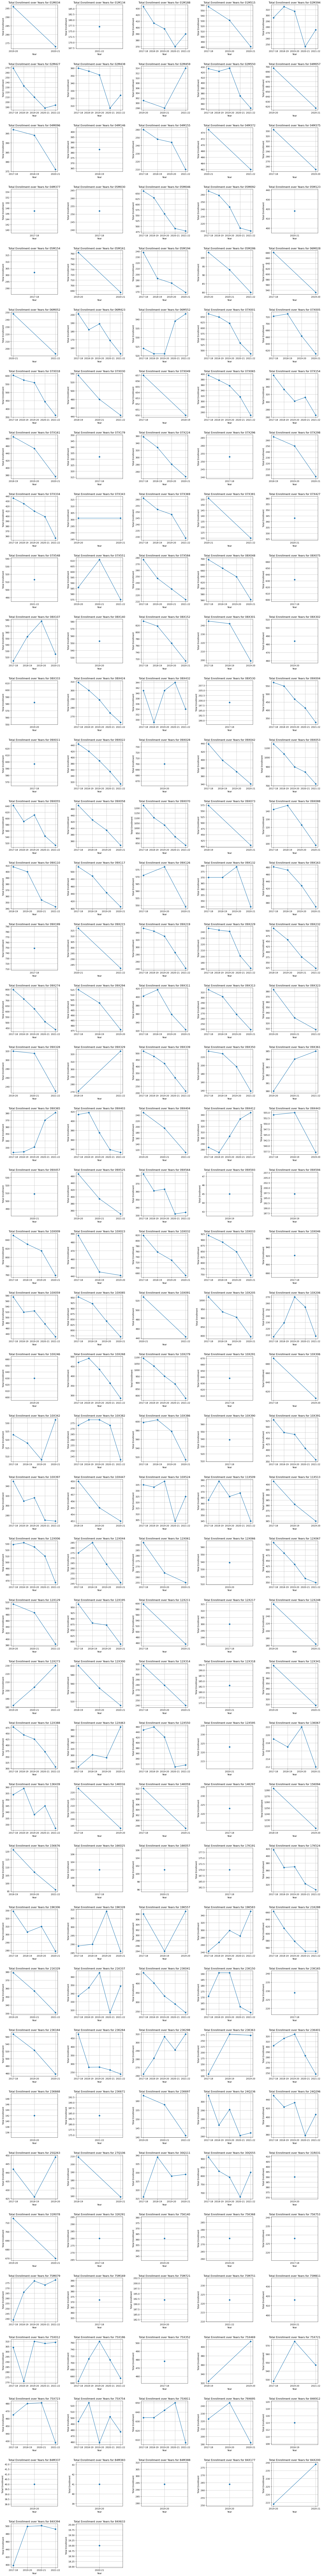

In [14]:
n_groups = len(groupedEN)
cols = 5  # Number of columns in the subplot grid
rows = n_groups // cols + (n_groups % cols > 0) 

fig, axes = plt.subplots(rows, cols, figsize=(25, rows * 5))  
fig.subplots_adjust(hspace=0.4, wspace=0.4)  
axes = axes.flatten()

# plot
for (name, group), ax in zip(groupedEN, axes):
    group.sort_values('Year', inplace=True)
    ax.plot(group['Year'], group['Total Enrollment'], marker='o', label=f'Total Enrollment for {name}')
    ax.set_title(f'Total Enrollment over Years for {name}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Enrollment')
    # ax.legend()
    ax.grid(True)

for ax in axes[len(groupedEN):]:
    ax.axis('off')

plt.show()

Text(0, 0.5, 'Enrollment')

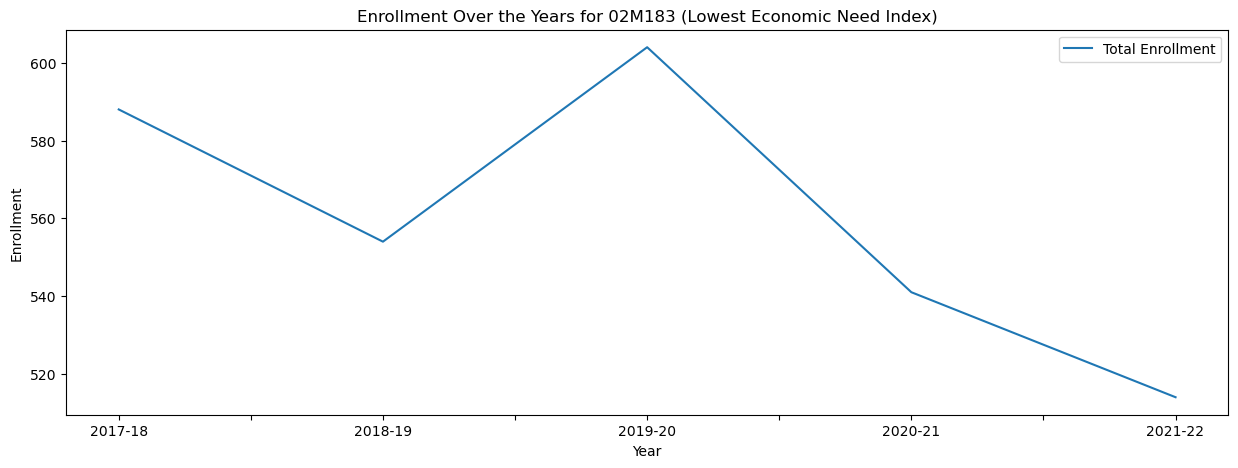

In [15]:
ax = enrollment_df[enrollment_df['DBN']=='02M183'].plot.line(
    x='Year',
    y='Total Enrollment',
    figsize=(15,5),
    title='Enrollment Over the Years for 02M183 (Lowest Economic Need Index)'
)
ax.set_ylabel('Enrollment')

Text(0, 0.5, 'Enrollment')

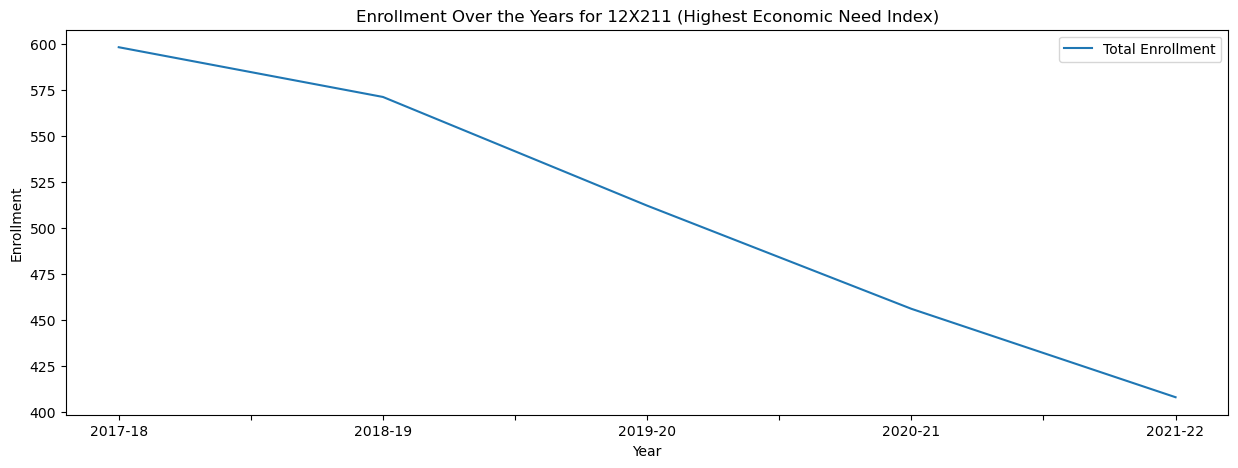

In [16]:
ax = enrollment_df[enrollment_df['DBN']=='12X211'].plot.line(
    x='Year',
    y='Total Enrollment',
    figsize=(15,5),
    title='Enrollment Over the Years for 12X211 (Highest Economic Need Index)'
)
ax.set_ylabel('Enrollment')

In [17]:
enrollment_df.columns

Index(['DBN', 'School Name', 'Year', 'Total Enrollment', 'Grade 3K',
       'Grade PK (Half Day & Full Day)', 'Grade K', 'Grade 1', 'Grade 2',
       'Grade 3', 'Grade 4', 'Grade 5', 'Grade 6', 'Grade 7', 'Grade 8',
       'Grade 9', 'Grade 10', 'Grade 11', 'Grade 12', '# Female', '% Female',
       '# Male', '% Male', '# Asian', '% Asian', '# Black', '% Black',
       '# Hispanic', '% Hispanic', '# Multi-Racial', '% Multi-Racial',
       '# Native American', '% Native American', '# White', '% White',
       '# Missing Race/Ethnicity Data', '% Missing Race/Ethnicity Data',
       '# Students with Disabilities', '% Students with Disabilities',
       '# English Language Learners', '% English Language Learners',
       '# Poverty', '% Poverty', 'Economic Need Index'],
      dtype='object')

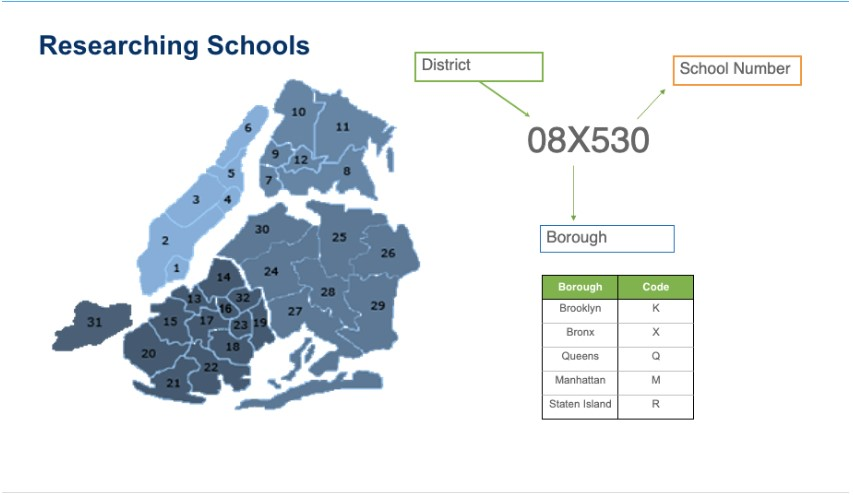

In [18]:
enrollment_df[['DBN','Year', 'Total Enrollment','# Female', '% Female', '# Male', '% Male','# Poverty', '% Poverty', 'Economic Need Index']]

DBN     Year  Total Enrollment  # Female  % Female  # Male  % Male  \
0     01M015  2017-18               190        99     0.521      91   0.479   
1     01M015  2018-19               174        85     0.489      89   0.511   
2     01M015  2019-20               190        94     0.495      96   0.505   
3     01M015  2020-21               193       101     0.523      92   0.477   
4     01M015  2021-22               179        96     0.536      83   0.464   
...      ...      ...               ...       ...       ...     ...     ...   
9246  84X730  2017-18               314       173     0.551     141   0.449   
9247  84X730  2018-19               430       232     0.540     198   0.460   
9248  84X730  2019-20               523       280     0.535     243   0.465   
9249  84X730  2020-21               626       340     0.543     286   0.457   
9250  84X730  2021-22               598       325     0.543     273   0.457   

     # Poverty % Poverty  Economic Need Index  
0          161     84.7%                0.890  
1          147     84.5%                0.888  
2          155     81.6%                0.867  
3          161     83.4%                0.864  
4          150     83.8%                0.879  
...        ...       ...                  ...  
9246       258     82.2%                0.891  
9247       363     84.4%                0.888  
9248       453     86.6%                0.892  
9249       547     87.4%                0.889  
9250       540     90.3%                0.903  

[9251 rows x 10 columns]

In [19]:
attendance_df = pd.read_csv('../data/2018-2021_Daily_Attendance_by_School_20240410.csv')

In [20]:
attendance_df.sample(5)

School DBN                     Date  SchoolYear  Enrolled  Present  \
173083     06M311               10/24/2018    20182019     403.0    395.0   
541384     10X206  2021-06-04T00:00:00.000    20202021     255.0    229.0   
610678     18K637  2021-05-24T00:00:00.000    20202021     332.0    331.0   
638126     22K207  2021-04-12T00:00:00.000    20202021    1007.0    959.0   
379472     15K131               09/19/2019    20192020     848.0    815.0   

        Absent  Released  
173083     8.0       0.0  
541384    26.0       0.0  
610678     1.0       0.0  
638126    48.0       0.0  
379472    33.0       0.0

In [21]:
attendance_df.rename(columns={'School DBN':'DBN'}, inplace=True)

In [22]:
attendance_df.sample(10)

DBN                     Date  SchoolYear  Enrolled  Present  \
383496  19K214               12/11/2019    20192020     865.0    743.0   
227388  21K128               05/06/2019    20182019     471.0    455.0   
242924  11X542               09/18/2019    20192020     493.0    450.0   
103189  02M394               11/02/2018    20182019     313.0    282.0   
539755  10X085  2021-03-10T00:00:00.000    20202021     770.0    733.0   
402031  20K187               10/30/2019    20192020     982.0    964.0   
186537  11X169               10/16/2018    20182019     419.0    397.0   
435855  29Q095               11/26/2018    20182019    1433.0   1309.0   
537586  10X032  2020-11-10T00:00:00.000    20202021     672.0    613.0   
206707  08X376               10/05/2018    20182019     443.0    399.0   

        Absent  Released  
383496   122.0       0.0  
227388    16.0       0.0  
242924    43.0       0.0  
103189    31.0       0.0  
539755    37.0       0.0  
402031    18.0       0.0  
186537    22.0       0.0  
435855   124.0       0.0  
537586    59.0       0.0  
206707    44.0       0.0

In [23]:
attendance_df['Date'].unique()

array(['09/05/2018', '09/06/2018', '09/07/2018', '09/12/2018',
       '09/13/2018', '09/14/2018', '09/17/2018', '09/18/2018',
       '09/20/2018', '09/21/2018', '09/24/2018', '09/25/2018',
       '09/26/2018', '09/27/2018', '09/28/2018', '10/01/2018',
       '10/02/2018', '10/03/2018', '10/04/2018', '10/05/2018',
       '10/09/2018', '10/10/2018', '10/11/2018', '10/12/2018',
       '10/15/2018', '10/16/2018', '10/17/2018', '10/18/2018',
       '10/19/2018', '10/22/2018', '10/23/2018', '10/24/2018',
       '10/25/2018', '10/26/2018', '11/27/2018', '11/28/2018',
       '11/29/2018', '11/30/2018', '12/03/2018', '12/04/2018',
       '12/05/2018', '12/06/2018', '12/07/2018', '12/10/2018',
       '12/11/2018', '12/12/2018', '12/13/2018', '12/14/2018',
       '12/17/2018', '12/18/2018', '12/19/2018', '12/20/2018',
       '12/21/2018', '01/02/2019', '01/03/2019', '01/04/2019',
       '01/09/2019', '01/10/2019', '01/11/2019', '01/14/2019',
       '01/15/2019', '01/16/2019', '01/17/2019', '01/18

In [24]:
attendance_df['Date'] = attendance_df['Date'].str.split('T').str[0]
# splitting "Time" 'T00:00:00.000' to only have the date

attendance_df['Date'].unique()

array(['09/05/2018', '09/06/2018', '09/07/2018', '09/12/2018',
       '09/13/2018', '09/14/2018', '09/17/2018', '09/18/2018',
       '09/20/2018', '09/21/2018', '09/24/2018', '09/25/2018',
       '09/26/2018', '09/27/2018', '09/28/2018', '10/01/2018',
       '10/02/2018', '10/03/2018', '10/04/2018', '10/05/2018',
       '10/09/2018', '10/10/2018', '10/11/2018', '10/12/2018',
       '10/15/2018', '10/16/2018', '10/17/2018', '10/18/2018',
       '10/19/2018', '10/22/2018', '10/23/2018', '10/24/2018',
       '10/25/2018', '10/26/2018', '11/27/2018', '11/28/2018',
       '11/29/2018', '11/30/2018', '12/03/2018', '12/04/2018',
       '12/05/2018', '12/06/2018', '12/07/2018', '12/10/2018',
       '12/11/2018', '12/12/2018', '12/13/2018', '12/14/2018',
       '12/17/2018', '12/18/2018', '12/19/2018', '12/20/2018',
       '12/21/2018', '01/02/2019', '01/03/2019', '01/04/2019',
       '01/09/2019', '01/10/2019', '01/11/2019', '01/14/2019',
       '01/15/2019', '01/16/2019', '01/17/2019', '01/18

In [25]:
# attendance_df['Date'] = pd.to_datetime(attendance_df['Date'])

def dates(date):
    for fmt in ("%Y-%m-%d", "%m/%d/%Y"):
        try:
            return pd.to_datetime(date, format=fmt)
        except ValueError:
            continue
    return pd.NaT  

attendance_df['Date'] = attendance_df['Date'].apply(dates)

attendance_df['Date'].sample(10)

141328   2020-01-28
242175   2020-01-27
271988   2020-02-03
220852   2020-01-14
204868   2018-10-01
388163   2019-06-12
378660   2019-11-22
623224   2021-02-25
650110   2020-11-04
705450   2021-01-12
Name: Date, dtype: datetime64[ns]

In [26]:
attendance_df.info()
attendance_df['Date'].isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736578 entries, 0 to 736577
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   DBN         736578 non-null  object        
 1   Date        736578 non-null  datetime64[ns]
 2   SchoolYear  736578 non-null  int64         
 3   Enrolled    736471 non-null  float64       
 4   Present     736471 non-null  float64       
 5   Absent      736471 non-null  float64       
 6   Released    736471 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 39.3+ MB


0

In [27]:
# creating a month column and undoing the indexing
attendance_df.set_index('Date', inplace=True)
attendance_df['month'] = attendance_df.index.to_period('M')
attendance_df = attendance_df.reset_index()

In [28]:
# grouping by month and DBN
groupedAtt = attendance_df.set_index(['month','DBN'])
groupedAtt = groupedAtt.groupby(['month', 'DBN'])

groupedAtt.head(10)

Date  SchoolYear  Enrolled  Present  Absent  Released
month   DBN                                                               
2018-09 15K896 2018-09-05    20182019      14.0     14.0     0.0       0.0
        15K896 2018-09-06    20182019      26.0     26.0     0.0       0.0
        15K896 2018-09-07    20182019      26.0     25.0     1.0       0.0
        15K896 2018-09-12    20182019      27.0     26.0     1.0       0.0
        15K896 2018-09-13    20182019      28.0     27.0     1.0       0.0
...                   ...         ...       ...      ...     ...       ...
2021-06 75X811 2021-06-09    20202021     637.0    495.0   141.0       1.0
        75X811 2021-06-10    20202021     637.0    502.0   135.0       0.0
        75X811 2021-06-11    20202021     637.0    493.0   143.0       1.0
        75X811 2021-06-14    20202021     637.0    489.0   147.0       1.0
        75X811 2021-06-15    20202021     637.0    500.0   135.0       2.0

[428016 rows x 6 columns]

In [29]:
# getting the averages 

avg_enroll = groupedAtt['Enrolled'].mean().reset_index()
avg_present = groupedAtt['Present'].mean().reset_index()
avg_absent = groupedAtt['Absent'].mean().reset_index()
avg_released = groupedAtt['Released'].mean().reset_index()

In [30]:
# School with Highest Economic Need Index - 12X211
# avg_enroll[avg_enroll['DBN'] == '12X211']

In [31]:
attendance = avg_enroll.merge(avg_present, on = ['month','DBN'])
attendance = attendance.merge(avg_absent, on = ['month', 'DBN'])
attendance = attendance.merge(avg_released, on = ['month','DBN'])

In [32]:
col_rename = {
    'Enrolled': 'avg_enrolled',
    'Present': 'avg_present',
    'Absent': 'avg_absent',
    'Released': 'avg_released'
}
attendance.rename(columns= col_rename, inplace = True)
# attendance.sample(5)

In [33]:
attendance[attendance['DBN'] == '12X211']

month     DBN  avg_enrolled  avg_present  avg_absent  avg_released
614    2018-09  12X211    572.066667   545.666667   26.400000      0.000000
2191   2018-10  12X211    571.818182   554.454545   17.363636      0.000000
3768   2018-11  12X211    569.444444   541.833333   27.611111      0.000000
5345   2018-12  12X211    567.333333   543.066667   24.266667      0.000000
6922   2019-01  12X211    569.142857   534.571429   34.571429      0.000000
8499   2019-02  12X211    569.928571   541.357143   26.785714      1.785714
10076  2019-03  12X211    570.800000   544.950000   25.850000      0.000000
11653  2019-04  12X211    572.812500   546.312500   26.500000      0.000000
13230  2019-05  12X211    573.454545   548.681818   24.772727      0.000000
14807  2019-06  12X211    568.933333   516.000000   52.933333      0.000000
16383  2019-09  12X211    516.411765   497.647059   18.764706      0.000000
17961  2019-10  12X211    514.100000   497.450000   16.650000      0.000000
19539  2019-11  12X211    507.411765   483.294118   22.823529      1.294118
21117  2019-12  12X211    499.666667   473.333333   26.333333      0.000000
22695  2020-01  12X211    495.619048   461.571429   34.047619      0.000000
24273  2020-02  12X211    497.666667   477.466667   20.200000      0.000000
25851  2020-03  12X211    496.900000   452.700000   41.800000      2.400000
27434  2020-09  12X211    461.500000   395.700000   65.800000      0.000000
29036  2020-10  12X211    460.761905   410.761905   50.000000      0.000000
30638  2020-11  12X211    456.000000   415.444444   40.555556      0.000000
32240  2020-12  12X211    455.000000   419.941176   35.058824      0.000000
33842  2021-01  12X211    454.736842   416.526316   38.210526      0.000000
35444  2021-02  12X211    451.500000   420.214286   31.285714      0.000000
37046  2021-03  12X211    449.400000   425.700000   23.700000      0.000000
38648  2021-04  12X211    450.000000   424.650000   25.350000      0.000000
40250  2021-05  12X211    449.684211   424.157895   25.526316      0.000000
41852  2021-06  12X211    449.000000   410.647059   38.352941      0.000000

In [34]:
# plt.figure(figsize=(10,5))

# plt.plot(attendance['month'],attendance['avg_month_present'], marker='o', linestyle='-')
# plt.title('Average Monthly Present for DBN 12X211')
# plt.xlabel('Month')
# plt.ylabel('Average Monthly Present')

# plt.show()

Text(0, 0.5, 'Absents')

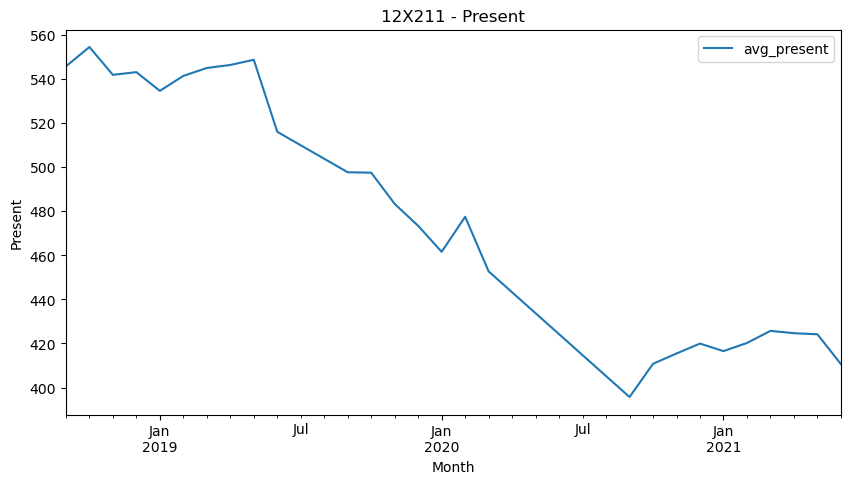

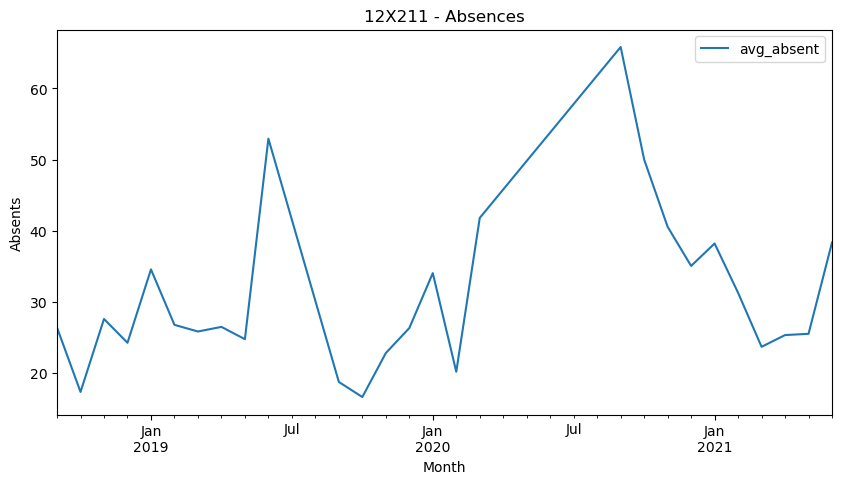

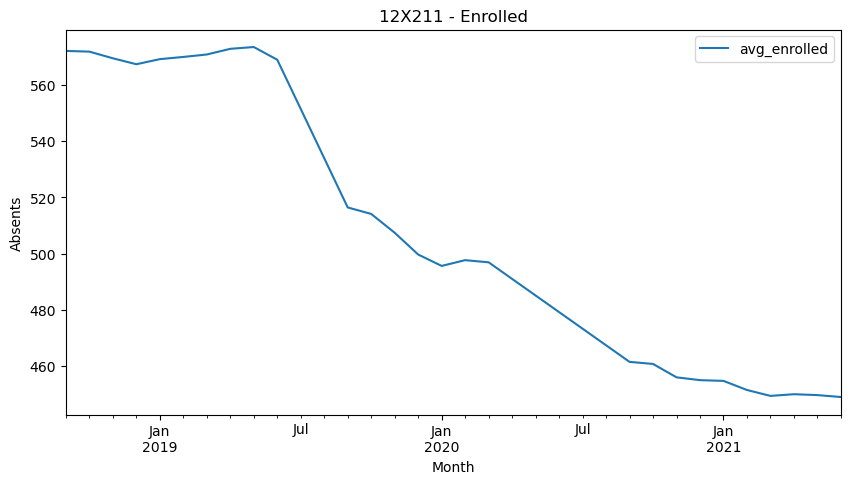

In [36]:
# School with Highest Economic Need  - 12X211
ax = attendance[attendance['DBN'] == '12X211'].plot.line(
    x = 'month',
    y = 'avg_present',
    figsize = (10,5),
    title = '12X211 - Present'
)
ax.set_xlabel('Month')
ax.set_ylabel('Present')

# 12X211 - Absences
ax = attendance[attendance['DBN'] == '12X211'].plot.line(
    x = 'month',
    y = 'avg_absent',
    figsize = (10,5),
    title = '12X211 - Absences'
)
ax.set_xlabel('Month')
ax.set_ylabel('Absents')

# 12X211 - Enrolled
ax = attendance[attendance['DBN'] == '12X211'].plot.line(
    x = 'month',
    y = 'avg_enrolled',
    figsize = (10,5),
    title = '12X211 - Enrolled'
)
ax.set_xlabel('Month')
ax.set_ylabel('Absents')

Text(0, 0.5, 'Absents')

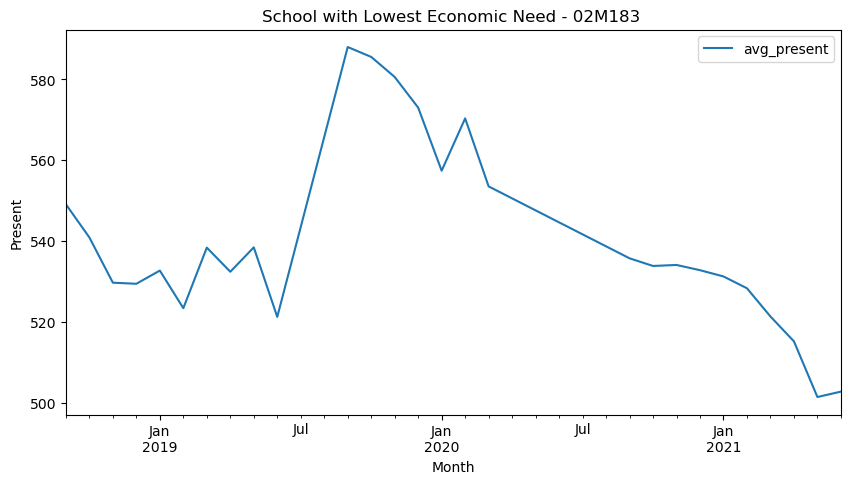

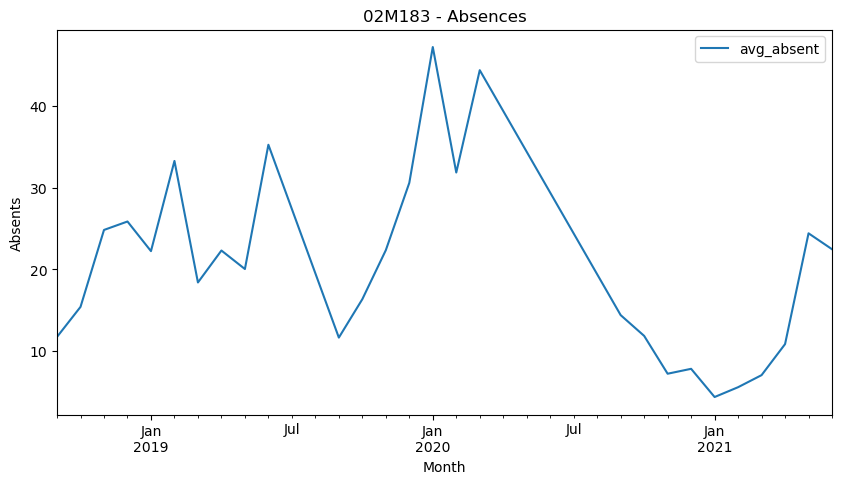

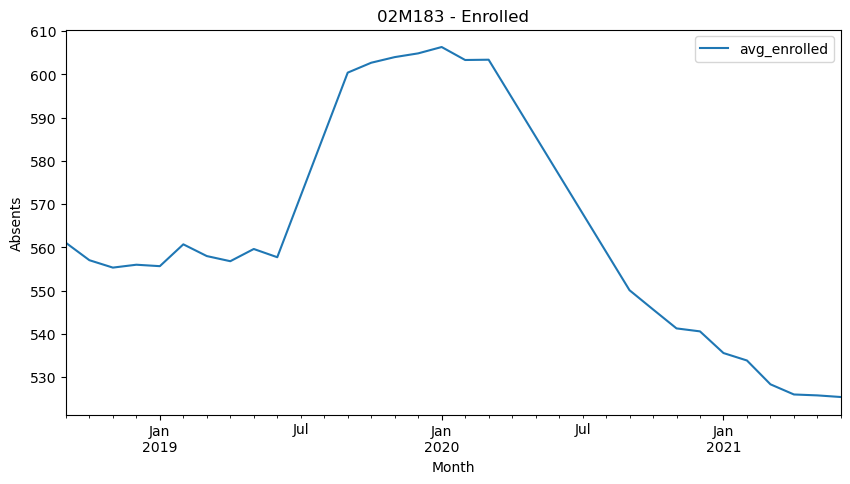

In [37]:
# School with Lowest Economic Need  - 02M183

ax = attendance[attendance['DBN'] == '02M183'].plot.line(
    x = 'month',
    y = 'avg_present',
    figsize = (10,5),
    title = 'School with Lowest Economic Need - 02M183 '
)
ax.set_xlabel('Month')
ax.set_ylabel('Present')

# 12X211 - Absences
ax = attendance[attendance['DBN'] == '02M183'].plot.line(
    x = 'month',
    y = 'avg_absent',
    figsize = (10,5),
    title = '02M183 - Absences'
)
ax.set_xlabel('Month')
ax.set_ylabel('Absents')

# 12X211 - Enrolled
ax = attendance[attendance['DBN'] == '02M183'].plot.line(
    x = 'month',
    y = 'avg_enrolled',
    figsize = (10,5),
    title = '02M183 - Enrolled'
)
ax.set_xlabel('Month')
ax.set_ylabel('Absents')